In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

warnings.filterwarnings("ignore")

sns.set

labelencoder = preprocessing.LabelEncoder()

##### Import des datasets

In [2]:
fraud_data = pd.read_csv("./data/Fraud_Data.csv")
ip_addr = pd.read_csv("./data/IpAddress_to_Country.csv")
fraud = fraud_data
ip = ip_addr

In [3]:
fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [4]:
ip

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


##### Drop de tous les na 

In [5]:
fraud.dropna()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [6]:
ip.dropna()

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


##### Changer les colonnes avec des valeurs qualitatives en valeurs quantitatives .

In [7]:
fraud['source'] = labelencoder.fit_transform(fraud['source'])
fraud['browser'] = labelencoder.fit_transform(fraud['browser'])
fraud['device_id'] = labelencoder.fit_transform(fraud['device_id'])

##### Changer la colone sex en boolean

In [8]:
fraud['sex'] = fraud['sex'].astype('category').cat.codes

##### Drop colonnes de dates car Les fraudes peuvent avoir lieu a n'importe quel moment 

In [9]:
fraud = fraud.drop(['signup_time','purchase_time'], axis=1)

In [10]:
fraud

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,34,89215,2,0,1,39,7.327584e+08,0
1,333320,16,24078,0,0,0,53,3.503114e+08,0
2,1359,15,131216,2,3,1,53,2.621474e+09,1
3,150084,44,3977,2,4,1,41,3.840542e+09,0
4,221365,39,68757,0,4,1,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...
151107,345170,43,125335,2,0,1,28,3.451155e+09,1
151108,274471,35,63001,2,4,1,32,2.439047e+09,0
151109,368416,40,64204,2,2,0,26,2.748471e+09,0
151110,207709,46,13118,2,0,1,37,3.601175e+09,0


### Merging des deux datasets

Le but est d'ajouter au dataset une colonne Country qui provient de ip 

In [11]:
#iloc[0] selects the first row where ip lower <= ip and ip upper >= ip
def ip_to_country(ip_addr):
    try:
        return ip.country[(ip.lower_bound_ip_address <= ip_addr) & (ip.upper_bound_ip_address >= ip_addr)].iloc[0]
    except IndexError :
        return 'unknown'

In [12]:
fraud['country']= fraud.ip_address.apply(ip_to_country)

In [13]:
fraud

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,34,89215,2,0,1,39,7.327584e+08,0,Japan
1,333320,16,24078,0,0,0,53,3.503114e+08,0,United States
2,1359,15,131216,2,3,1,53,2.621474e+09,1,United States
3,150084,44,3977,2,4,1,41,3.840542e+09,0,unknown
4,221365,39,68757,0,4,1,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...
151107,345170,43,125335,2,0,1,28,3.451155e+09,1,United States
151108,274471,35,63001,2,4,1,32,2.439047e+09,0,Netherlands
151109,368416,40,64204,2,2,0,26,2.748471e+09,0,Japan
151110,207709,46,13118,2,0,1,37,3.601175e+09,0,United States


On enlève les lignes ou on a unkown dans la case country

In [14]:
fraud = fraud[fraud.country != 'unknown']

In [15]:
fraud

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,34,89215,2,0,1,39,7.327584e+08,0,Japan
1,333320,16,24078,0,0,0,53,3.503114e+08,0,United States
2,1359,15,131216,2,3,1,53,2.621474e+09,1,United States
4,221365,39,68757,0,4,1,45,4.155831e+08,0,United States
5,159135,42,2322,0,0,1,18,2.809315e+09,0,Canada
...,...,...,...,...,...,...,...,...,...,...
151106,360761,13,22251,2,4,0,42,8.740657e+08,0,United States
151107,345170,43,125335,2,0,1,28,3.451155e+09,1,United States
151108,274471,35,63001,2,4,1,32,2.439047e+09,0,Netherlands
151109,368416,40,64204,2,2,0,26,2.748471e+09,0,Japan


On isole la taget

In [16]:
y = fraud['class']
y

0         0
1         0
2         1
4         0
5         0
         ..
151106    0
151107    1
151108    0
151109    0
151110    0
Name: class, Length: 129146, dtype: int64

On isole les features en dropant 
    la targer  
    ip_address puisqu elle n apporte plus d informations que nous allons exploiter

In [17]:
x = fraud.drop(['ip_address', 'class'], axis=1)
x

,user_id,purchase_value,device_id,source,browser,sex,age,country
0,22058,34,89215,2,0,1,39,Japan
1,333320,16,24078,0,0,0,53,United States
2,1359,15,131216,2,3,1,53,United States
4,221365,39,68757,0,4,1,45,United States
5,159135,42,2322,0,0,1,18,Canada
...,...,...,...,...,...,...,...,...
151106,360761,13,22251,2,4,0,42,United States
151107,345170,43,125335,2,0,1,28,United States
151108,274471,35,63001,2,4,1,32,Netherlands
151109,368416,40,64204,2,2,0,26,Japan


On encode la colone counrty pour éviter d'avoir des chaines de caractères dans nos features

In [18]:
x['country'] = labelencoder.fit_transform(x['country'])
x

,user_id,purchase_value,device_id,source,browser,sex,age,country
0,22058,34,89215,2,0,1,39,84
1,333320,16,24078,0,0,0,53,171
2,1359,15,131216,2,3,1,53,171
4,221365,39,68757,0,4,1,45,171
5,159135,42,2322,0,0,1,18,32
...,...,...,...,...,...,...,...,...
151106,360761,13,22251,2,4,0,42,171
151107,345170,43,125335,2,0,1,28,171
151108,274471,35,63001,2,4,1,32,118
151109,368416,40,64204,2,2,0,26,84


On sépare notre environnement en train (features)/test (target)

In [19]:
splits = train_test_split(x, y, random_state = 0)
for s in splits:
    print (s.shape)
x_train, x_test, y_train, y_test = splits
scaler = StandardScaler()

(96859, 8)
(32287, 8)
(96859,)
(32287,)


Fonction qui calule l'accuracy

In [20]:
def accuracy(preds, Y):
  return ((preds == Y).sum() / len(Y)* 100)

### Entrainement du modèle 

On applique l'algorithme RandomForest

In [21]:
rf = RF()
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)
proba = rf.predict_proba(x_test)
print(prediction)
print(proba)

[0 0 0 ... 0 0 0]
[[0.94 0.06]
 [0.87 0.13]
 [0.92 0.08]
 ...
 [0.96 0.04]
 [0.96 0.04]
 [0.93 0.07]]


In [22]:
rf = RF()
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


Accuracy

In [23]:
accuracy(prediction, y_test)

94.23916746678229

On a une accuracy de 94% donc notre algo testé prédit la fraud dans 94% des cas sur les données de test

In [24]:
rf.fit(x_train, y_train)
importance = rf.feature_importances_
importance

array([0.21926535, 0.18154628, 0.27837266, 0.0258358 , 0.03131809,
       0.01642664, 0.14590002, 0.10133517])

Somme des pouvoirs predictif : 1.0


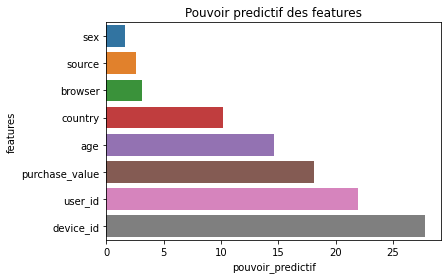

In [25]:
d = pd.DataFrame()
d['features'] = x_train.columns
d['pouvoir_predictif'] = importance
print('Somme des pouvoirs predictif : {}'.format(d['pouvoir_predictif'].sum()))
d['pouvoir_predictif'] = d['pouvoir_predictif'].apply(lambda v : v*100)
d = d.sort_values(by='pouvoir_predictif', ascending=True)
sns.barplot(d['pouvoir_predictif'], d['features']).set_title('Pouvoir predictif des features');

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[29057,   144],
       [ 1716,  1370]])

Text(0.5, 1.0, 'Nombre de fraude en fonction du pays')

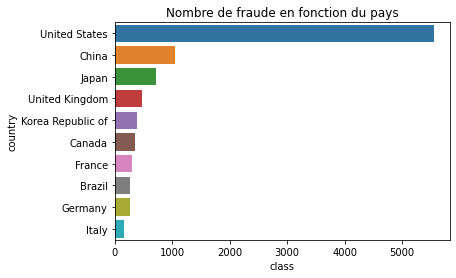

In [27]:
attack = fraud[fraud['class'] == 1]
attack = attack[['class','country']]

attack

total_attack = attack.groupby(by='country', as_index=False).sum().sort_values(by='class', ascending = False)
total_attack.head(15)

sns.barplot(total_attack['class'], total_attack['country'][:10]).set_title('Nombre de fraude en fonction du pays')

Text(0.5, 1.0, 'Nombre de fraude en fonction du device')

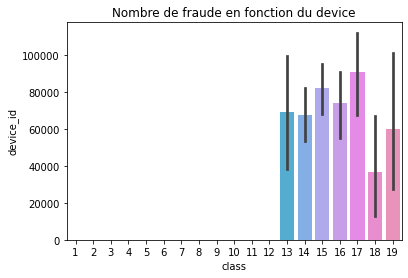

In [28]:
attack_device = fraud[fraud['class'] == 1]
attack_device = attack_device[['class','device_id']]

attack_device

total_attack = attack_device.groupby(by='device_id', as_index=False).sum().sort_values(by='class', ascending = False)
total_attack.head(15)

sns.barplot(total_attack['class'], total_attack['device_id'][:100]).set_title('Nombre de fraude en fonction du device')

Conclusion : 
    On peu voir que beaucoup d'utilisateurs qui fraudent le font depuis les Etats unis. Il est possible ue ce soit 

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [30]:
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [31]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), proba[:, i].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

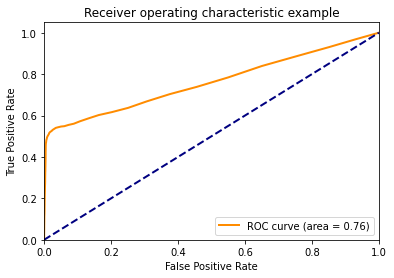

In [32]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [36]:

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

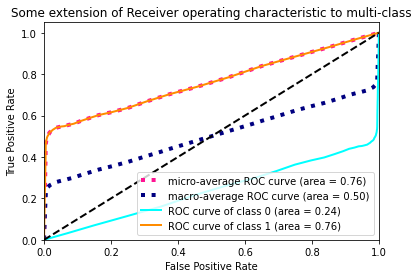

In [37]:

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Conclusion

On peut voir que la majorité des fraudes proviennent des etats unis. Il peut s'agir du pays ou l'application est le plus utilisée sinon on peut renforcer la protection quand un utilisteur s'enregistre avec une IP américaine 

On peut voir également que les fraudeurs recidivisent souvent avec les memes devices / user_id: on peut donc considérer le banissement de l'utilisateur et du device une fois ue fraude repérée.